Lab 5

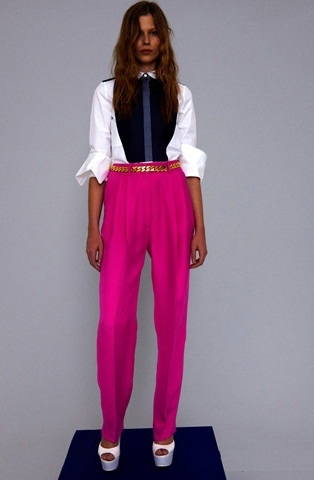

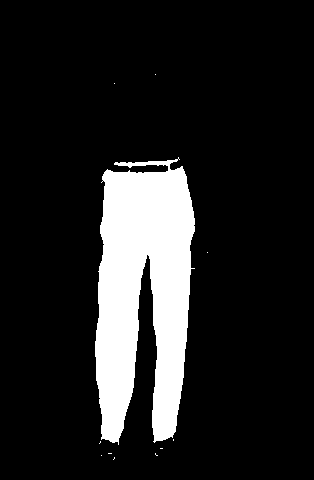

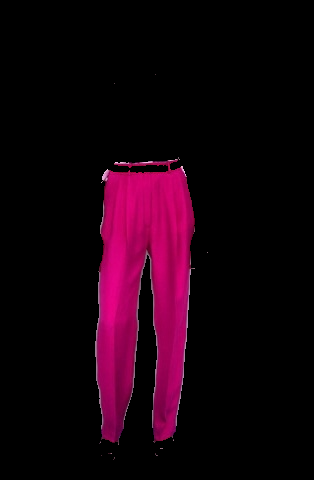

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# загрузка изображения
img = cv2.imread('rosy_pants.jpg')

# перевод изображения в формат HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# задание диапазона значений для розового цвета
lower_pink = np.array([150, 50, 50])
upper_pink = np.array([170, 255, 255])

# выделение розового цвета на изображении
mask = cv2.inRange(hsv, lower_pink, upper_pink)
res = cv2.bitwise_and(img, img, mask=mask)

# отображение результатов
cv2_imshow(img)
cv2_imshow(mask)
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()

Lab 6

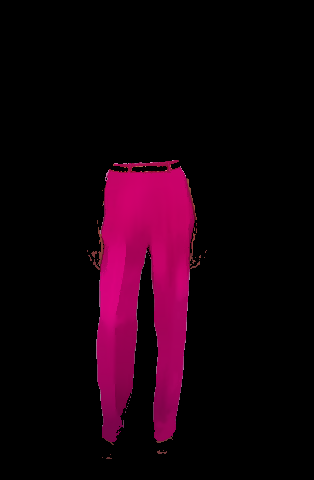

In [ ]:
import cv2
import numpy as np

# Загрузка изображения
img = cv2.imread('rosy_pants.jpg')

# Преобразование изображения в цветовое пространство HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Определение диапазона розового цвета в HSV
lower_pink = np.array([140, 100, 100])
upper_pink = np.array([180, 255, 255])

# Создание маски для розового цвета
mask = cv2.inRange(hsv_img, lower_pink, upper_pink)

# Применение mean shift для сегментации розового цвета
ms_img = cv2.pyrMeanShiftFiltering(img, 10, 30)

# Применение маски к изображению
result = cv2.bitwise_and(ms_img, ms_img, mask=mask)

# Отображение результата
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

Lab 4

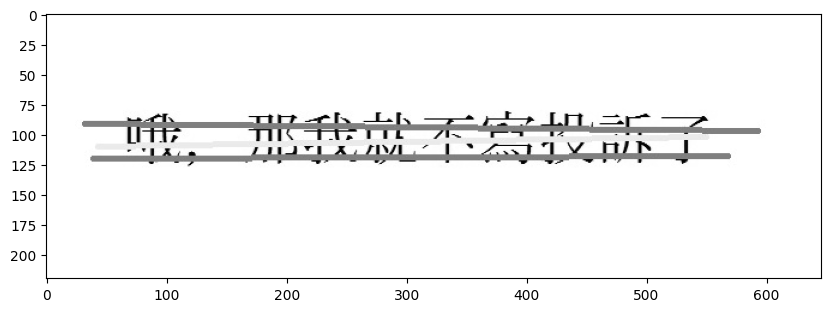

In [ ]:
import sys
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
#бинаризация
in_image = cv.imread('img.jpg')
rgb_image = cv.cvtColor(in_image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(in_image, cv.COLOR_BGR2HSV)
gray_image = cv.cvtColor(in_image, cv.COLOR_BGR2GRAY)

image = gray_image
plt.figure(figsize=(10, 8))
plt.imshow(gray_image, cmap='gray')

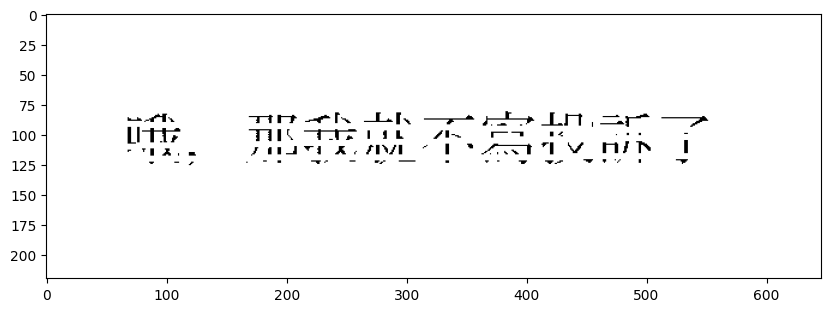

In [ ]:
#порог
threshold = 113

ret, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
plt.figure(figsize=(10, 70))
plt.imshow(thresh1, 'gray', vmin=0, vmax=255)

In [ ]:
cv.imwrite("thresh2DI.jpg", thresh1)

True

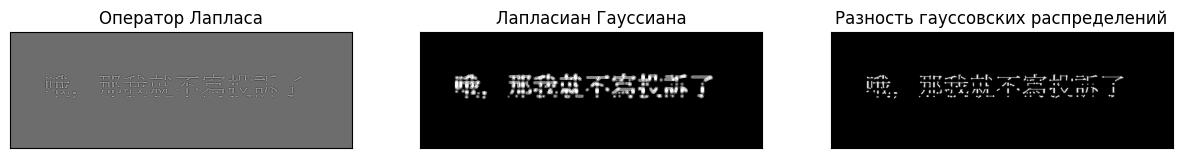

In [ ]:
outImageDepth = cv.CV_16S  # глубина результирующего изображения.
#Т.к. входное изображение 8-битное,
#чтобы избежать переполнения сделаем выходное изображение 16-битное.

gaussian33 = cv.GaussianBlur(thresh1, (3, 3), 0)
gaussian55 = cv.GaussianBlur(thresh1, (5, 5), 0)

# применяем оператор Лапласа к тестовому изображению
laplace = cv.Laplacian(thresh1, outImageDepth, ksize=3)
# laplace = cv.convertScaleAbs(laplace)
# вычисляем разность гауссовских разпределений
dog = gaussian33 - gaussian55
# dog = cv.convertScaleAbs(dog)
# вычисляем Лапласиан Гауссиана
log = cv.Laplacian(gaussian33, outImageDepth, ksize=3)
log = cv.convertScaleAbs(log)

# вывод
plt.figure(figsize=(15, 8))
gs = plt.GridSpec(1, 3)

titles = ['Оператор Лапласа', 'Лапласиан Гауссиана', 'Разность гауссовских распределений']
outImages = [laplace, log, dog]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()

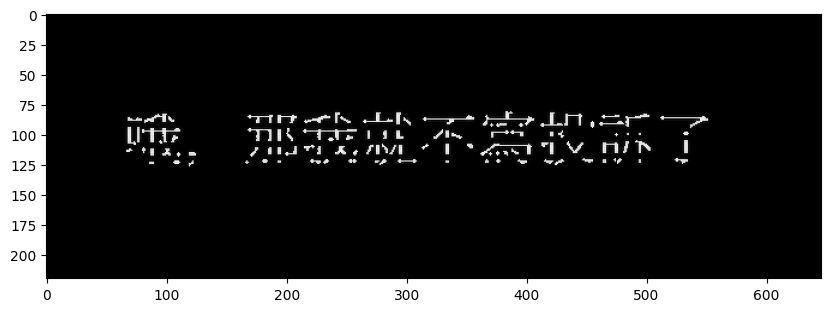

In [ ]:
plt.figure(figsize=(10, 70))
plt.imshow(dog, 'gray', vmin=0, vmax=255)

In [ ]:
cv.imwrite("Bl.jpg", dog)

True

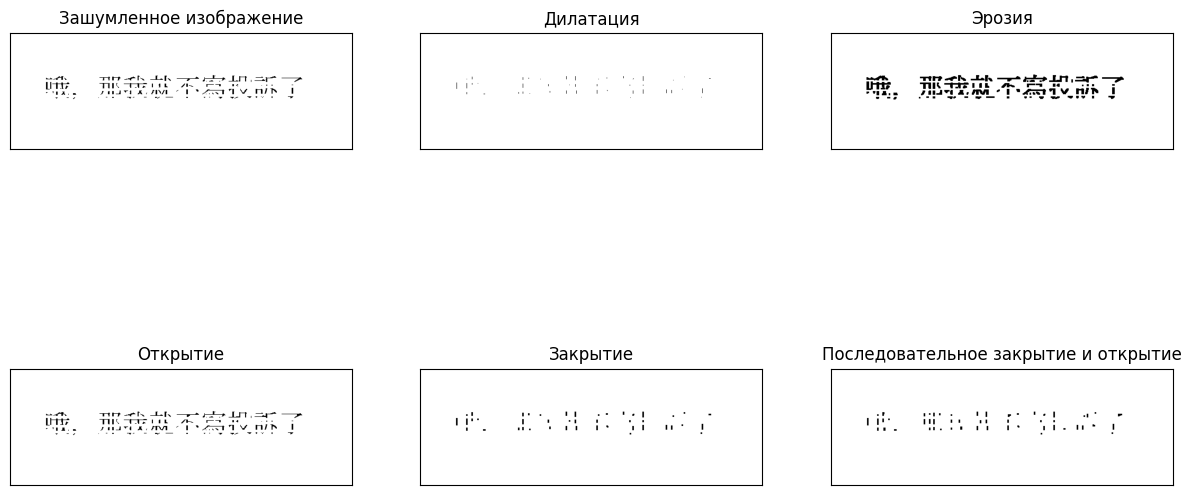

In [ ]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv.dilate(thresh1, kernel, iterations=1)
erosion = cv.erode(thresh1, kernel, iterations=1)
opening = cv.morphologyEx(thresh1, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(thresh1, cv.MORPH_CLOSE, kernel)
closeAndOpen = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

# вывод
plt.figure(figsize=(15, 8))
gs = plt.GridSpec(2, 3)

titles = ['Зашумленное изображение', 'Дилатация', 'Эрозия', 'Открытие', 'Закрытие',
          'Последовательное закрытие и открытие']
outImages = [thresh1, dilation, erosion, opening, closing, closeAndOpen]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()

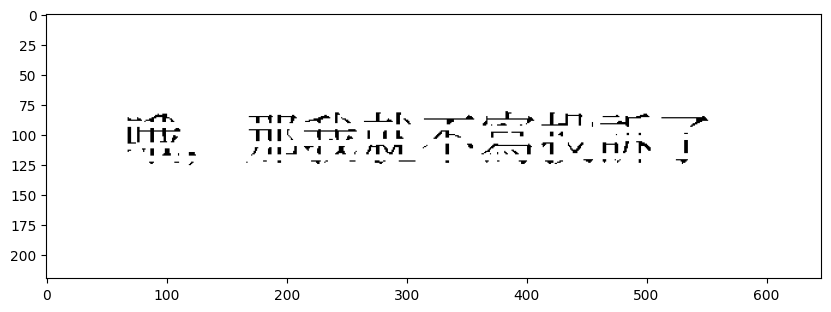

In [ ]:
plt.figure(figsize=(10, 70))
plt.imshow(opening, 'gray', vmin=0, vmax=255)
#plt.imshow(erosion, 'gray', vmin=0, vmax=255)

In [ ]:
cv.imwrite("Eroz.jpg", erosion)

True

перевод: "Ой, тогда я не буду писать жалобу"